In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### 데이터 불러오기

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


#####  데이터 확인

In [4]:
for i in train.columns:
    print(i + ":")
    print(train[i].unique())

no:
[    1     2     3 ... 29303 29304 29305]
age:
[25 39 35 64 24 66 56 70 21 33 45 54 63 58 44 31 17 43 18 23 50 19 38 29
 30 47 28 22 59 34 49 36 32 46 42 61 40 26 57 27 41 37 60 48 62 53 68 75
 20 51 73 69 72 65 76 52 55 74 90 67 78 80 77 71 81 83 82 79 85 87 84 88
 86 89]
workclass:
[' Private' ' Self-emp-not-inc' ' Local-gov' ' ?' ' State-gov'
 ' Self-emp-inc' ' Federal-gov' ' Without-pay' ' Never-worked']
fnlwgt:
[219199  52978 196899 ... 100605 372636 258474]
education:
[' 11th' ' Some-college' ' Bachelors' ' Assoc-voc' ' 9th' ' HS-grad'
 ' Masters' ' 5th-6th' ' Prof-school' ' 12th' ' 10th' ' Assoc-acdm'
 ' Doctorate' ' 7th-8th' ' 1st-4th' ' Preschool']
education-num:
[ 7 10 13 11  5  9 14  3 15  8  6 12 16  4  2  1]
marital-status:
[' Divorced' ' Never-married' ' Married-civ-spouse' ' Separated'
 ' Married-spouse-absent' ' Widowed' ' Married-AF-spouse']
occupation:
[' Machine-op-inspct' ' Other-service' ' Handlers-cleaners'
 ' Tech-support' ' Transport-moving' ' Farming-fishin

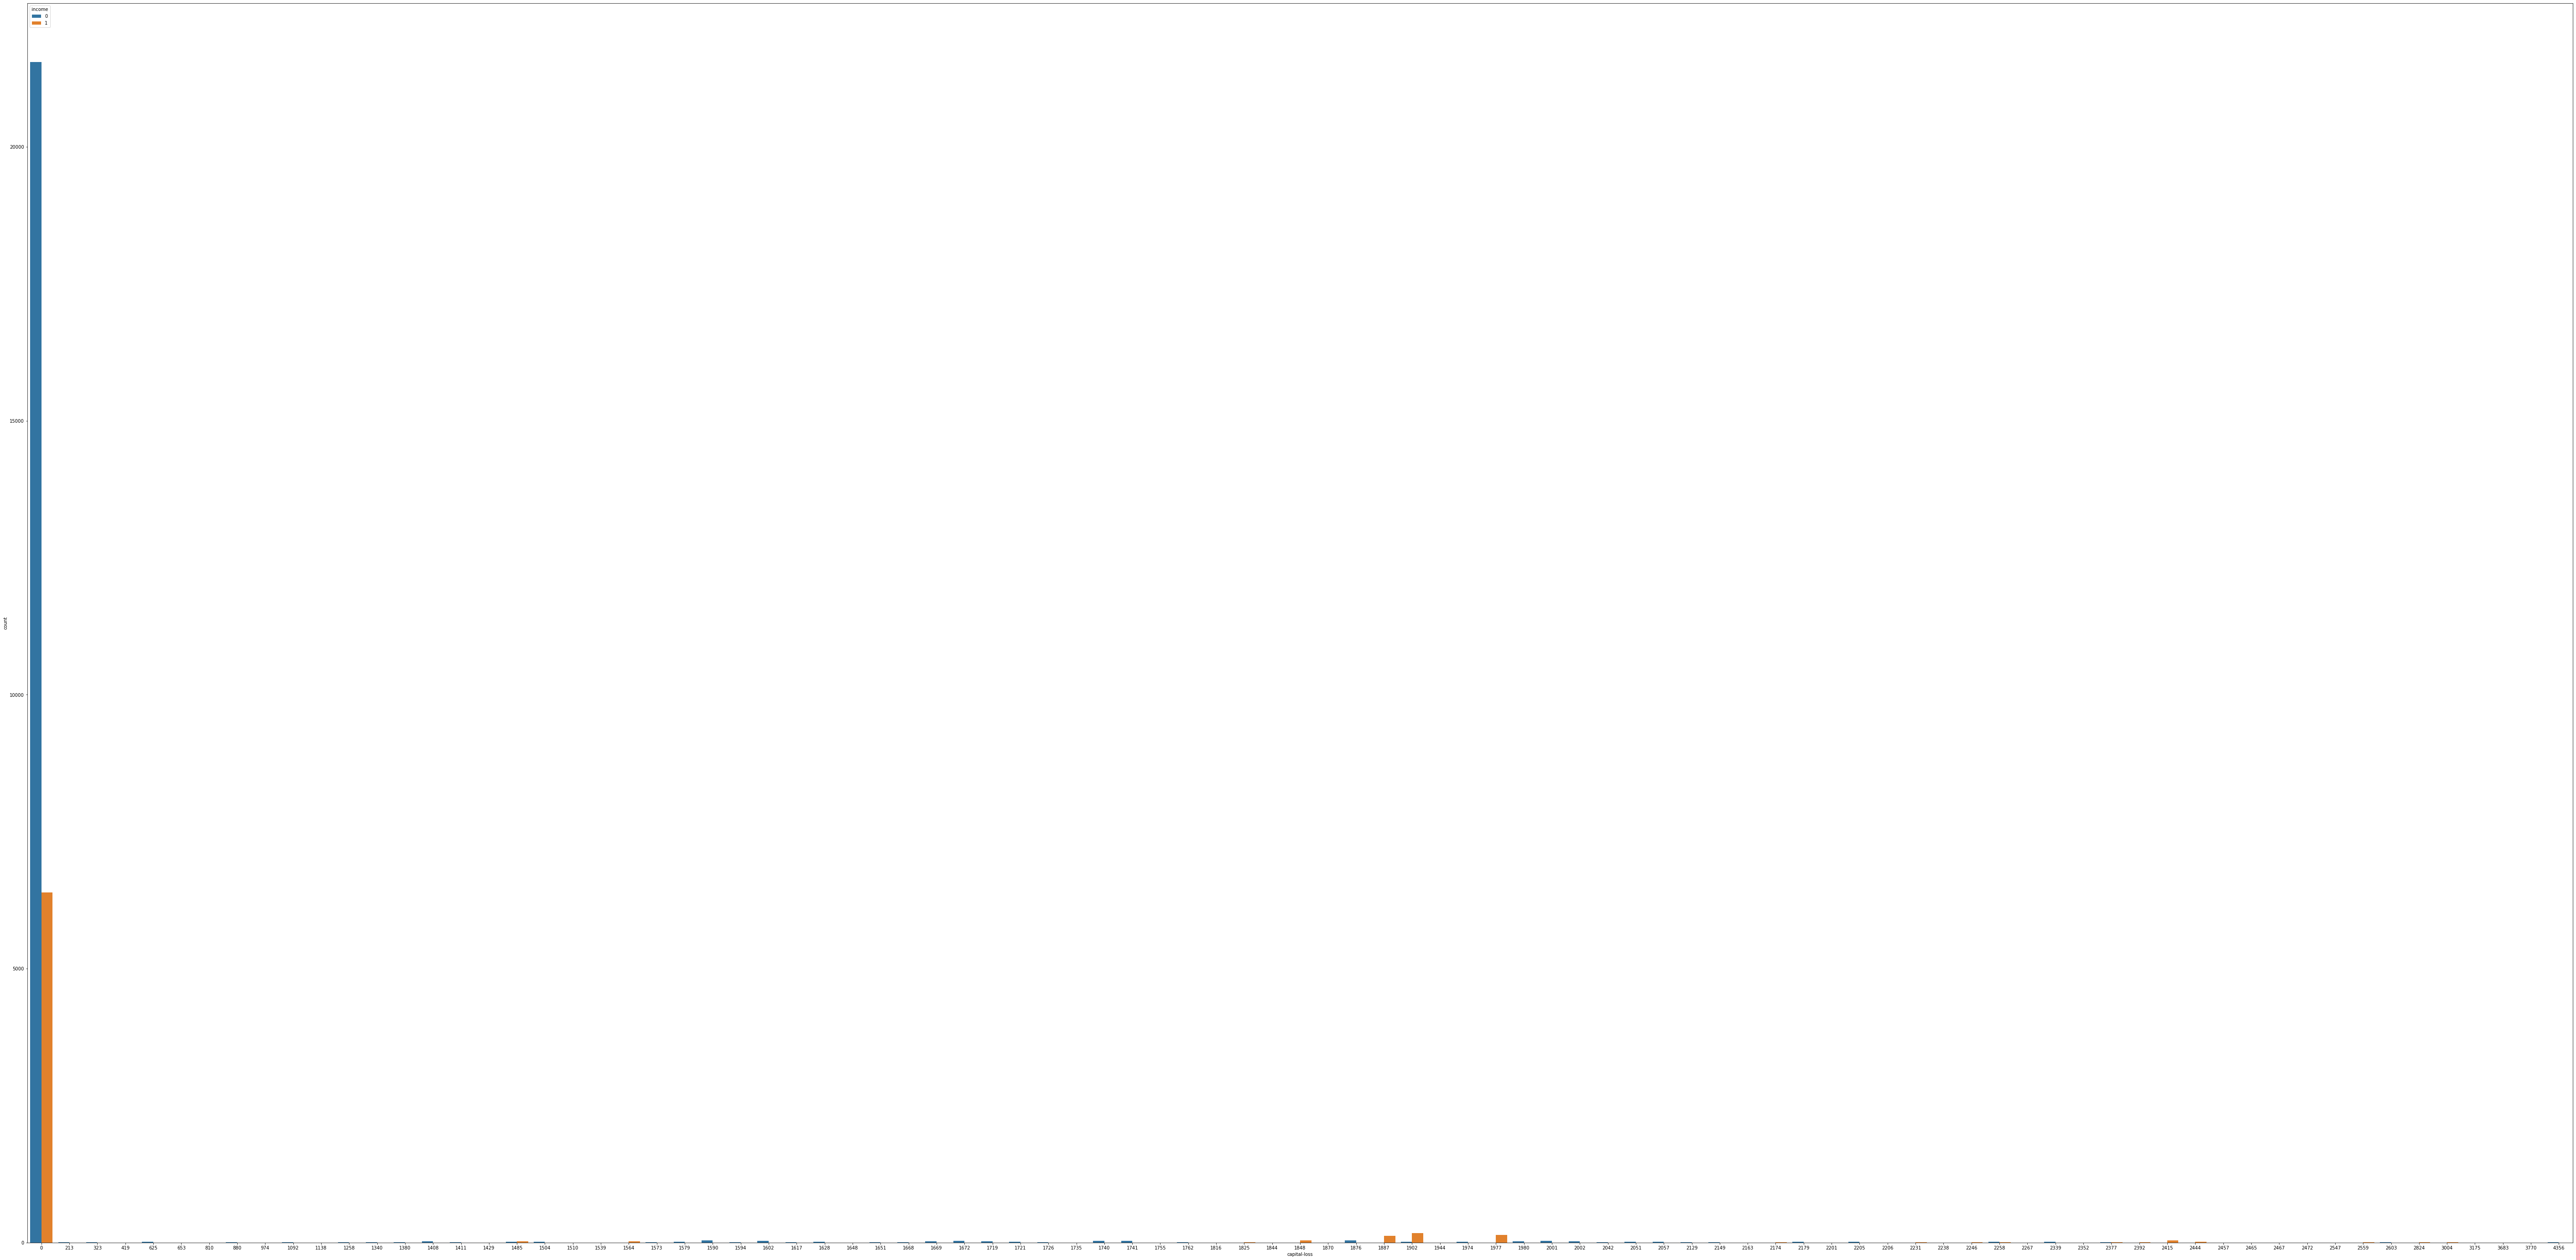

In [5]:
plt.figure(figsize = (100,50))
sns.countplot(data = train,
             x = 'capital-loss',
             hue = 'income')
plt.show()

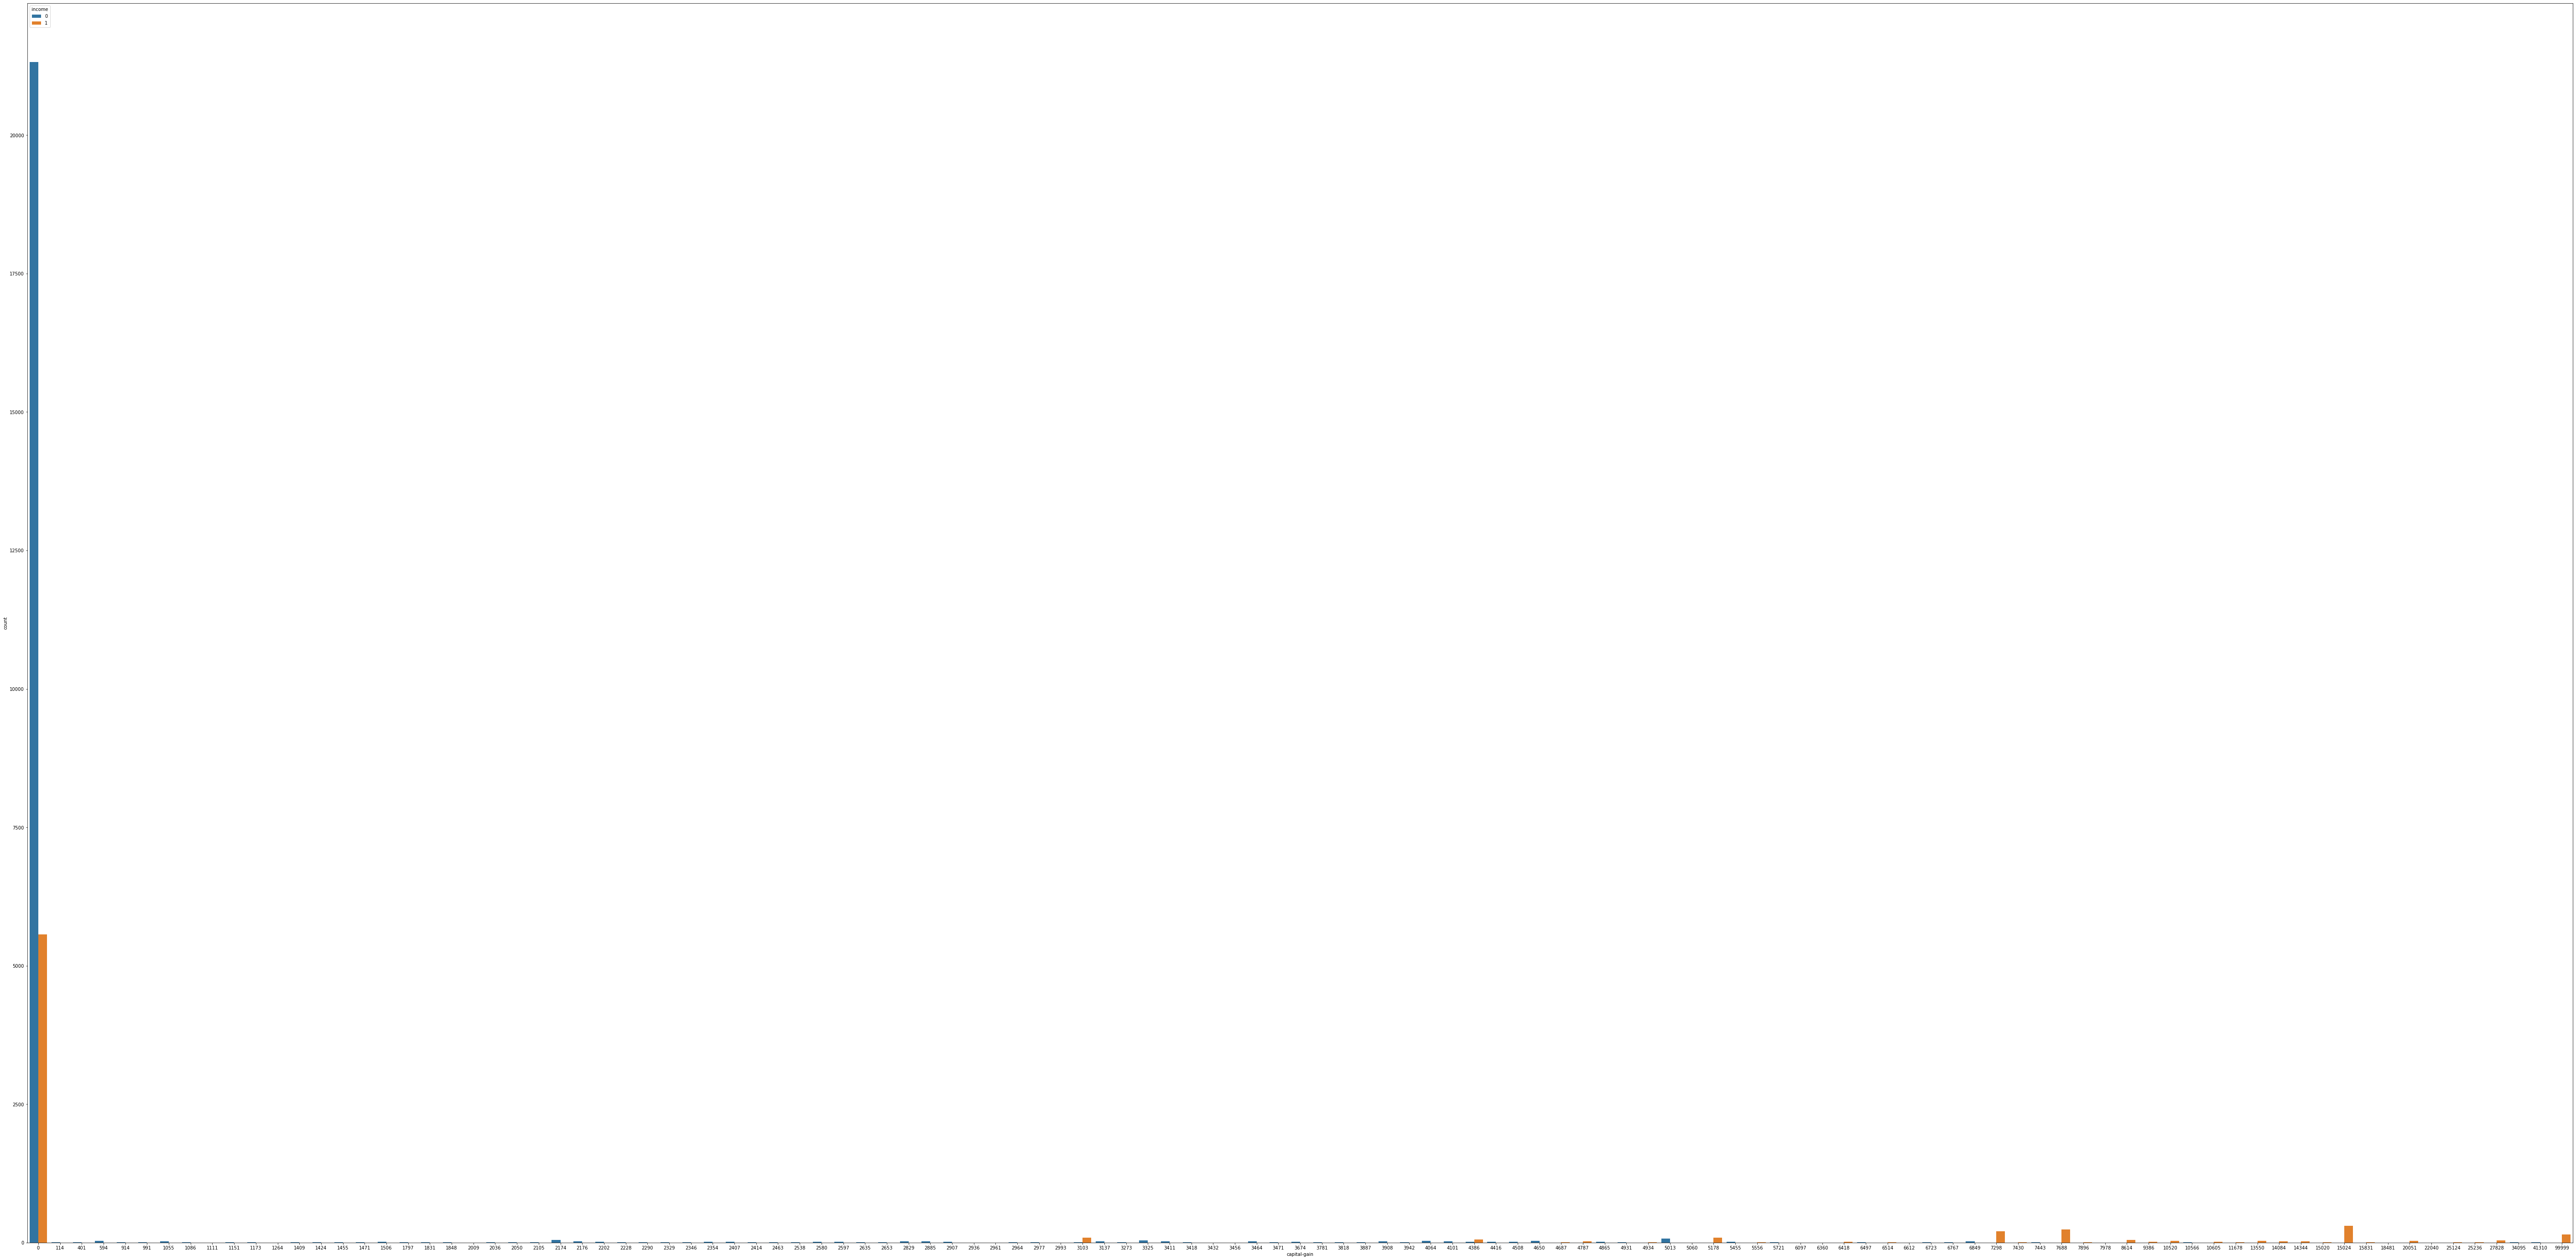

In [6]:
plt.figure(figsize = (100,50))
sns.countplot(data = train,
             x = 'capital-gain',
             hue = 'income')
plt.show()

##### 데이터를 확인해보니 no, capital-loss와 capital-gain 값이 income에 의미가 없어 보여, 드랍시킴


##### education 과education-num 의 공통점을 찾음
- Preschool==1
- 1st-4th==2
- 5th-6th==3
- 7th-8th==4
- 9th==5
- 10th==6
- 11th==7
- 12th==8
- HS-grad==9
- Some-college==10
- Assoc-voc==11
- Assoc-acdm==12
- Bachelors==13
- Masters==14
- Prof-school==15
- Doctorate==16


In [2]:
train.loc[train['education-num'] == 1, ['education', 'education-num']]

NameError: name 'train' is not defined

In [8]:
train.info() # 표를 확인해보니 널값은 없지만 ? 값으로 처리한 값이 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29305 entries, 0 to 29304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   no              29305 non-null  int64 
 1   age             29305 non-null  int64 
 2   workclass       29305 non-null  object
 3   fnlwgt          29305 non-null  int64 
 4   education       29305 non-null  object
 5   education-num   29305 non-null  int64 
 6   marital-status  29305 non-null  object
 7   occupation      29305 non-null  object
 8   relationship    29305 non-null  object
 9   race            29305 non-null  object
 10  sex             29305 non-null  object
 11  capital-gain    29305 non-null  int64 
 12  capital-loss    29305 non-null  int64 
 13  hours-per-week  29305 non-null  int64 
 14  native-country  29305 non-null  object
 15  income          29305 non-null  int64 
dtypes: int64(8), object(8)
memory usage: 3.6+ MB


In [9]:
train['native-country'].unique()

array([' United-States', ' Haiti', ' Mexico', ' Puerto-Rico',
       ' Philippines', ' ?', ' Germany', ' Peru', ' Ecuador', ' Iran',
       ' Thailand', ' Dominican-Republic', ' Poland', ' Scotland',
       ' Italy', ' Jamaica', ' China', ' Portugal', ' Columbia',
       ' Hungary', ' Vietnam', ' Taiwan', ' Canada', ' Hong',
       ' Guatemala', ' El-Salvador', ' England',
       ' Outlying-US(Guam-USVI-etc)', ' India', ' France', ' Cuba',
       ' Greece', ' Trinadad&Tobago', ' South', ' Japan', ' Yugoslavia',
       ' Nicaragua', ' Ireland', ' Cambodia', ' Laos', ' Honduras',
       ' Holand-Netherlands'], dtype=object)

#####  native-country 정형화시키기
- US 제외하고 나머지 나라는 모두 other로 변경해주기

In [10]:
nara = train['native-country']

In [11]:
len(nara)

29305

In [12]:
nara_list = []

In [13]:
for i in range(len(nara)):
    nara_list.append(nara[i])

In [14]:
nara_list

[' United-States',
 ' United-States',
 ' Haiti',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' Mexico',
 ' Puerto-Rico',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' Philippines',
 ' Mexico',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' ?',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' Haiti',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 ' United-States',
 

In [15]:
nara2_list = []

In [16]:

for i in range(len(nara_list)) :
    if nara_list[i] == ' United-States':
        nara2_list.append("US")
    else:
        nara2_list.append("other")
    
    
    

In [17]:
nara2_list 

['US',
 'US',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'US',
 'US',
 'US',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'US',
 'other',
 'US',
 'other',
 'US',
 'US',
 'US',
 'US',
 'U

In [18]:
train['native-country'] = nara2_list

In [19]:
train['native-country']

0           US
1           US
2        other
3           US
4           US
         ...  
29300    other
29301       US
29302       US
29303       US
29304       US
Name: native-country, Length: 29305, dtype: object

#####  인종 분류하기(white, black, other)
Islander = 섬사람

In [20]:
train['race'].unique()

array([' White', ' Asian-Pac-Islander', ' Black', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

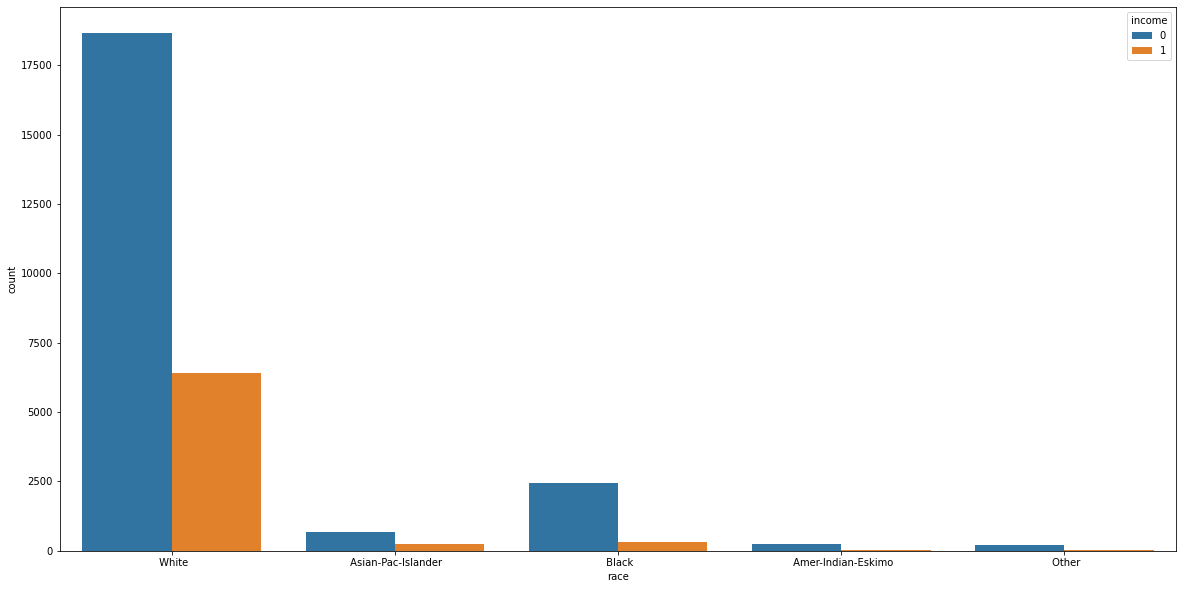

In [21]:
plt.figure(figsize = (20,10))
sns.countplot(data = train,
             x = 'race',
             hue = 'income')
plt.show()

In [22]:
face_list = []

In [23]:
face_list = train['race']

In [24]:
face2_list = []
for i in range(len(face_list)) :
    if face_list[i] == ' White':
        face2_list.append("W")
    elif face_list[i] == ' Asian-Pac-Islander':
        face2_list.append("A")
    else:
        face2_list.append("other")
    

In [25]:
train['race'] = face2_list

In [26]:
train['race']

0            W
1            W
2            A
3            W
4            W
         ...  
29300    other
29301    other
29302        W
29303        W
29304        W
Name: race, Length: 29305, dtype: object

In [27]:
train['workclass'].unique()

array([' Private', ' Self-emp-not-inc', ' Local-gov', ' ?', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype=object)

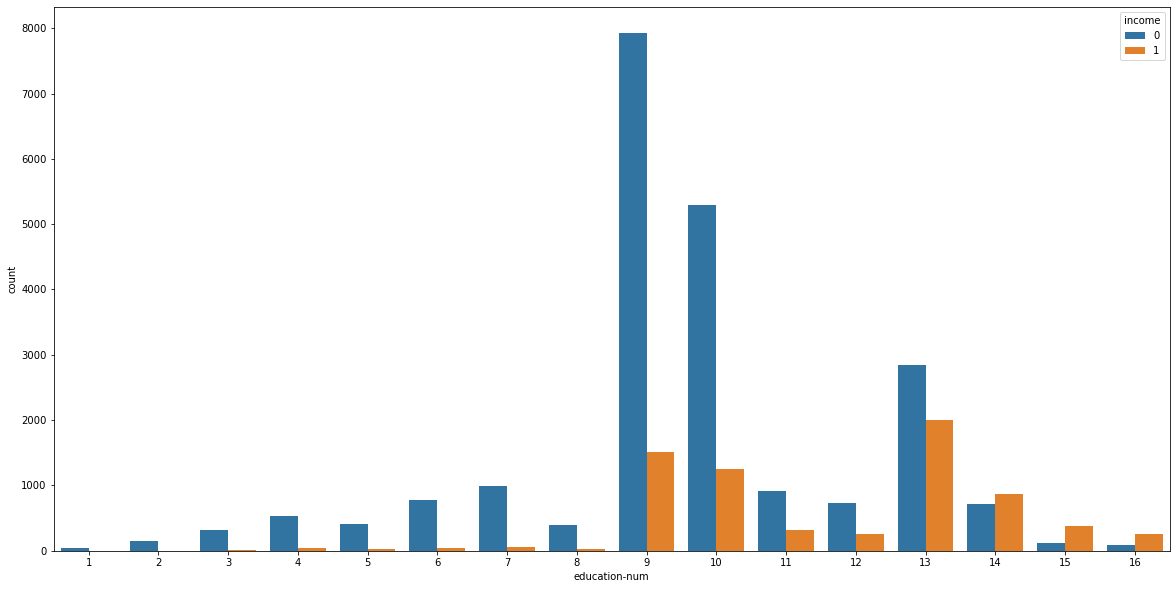

In [28]:
plt.figure(figsize = (20,10))
sns.countplot(data = train,
             x = 'education-num',
             hue = 'income')
plt.show()

In [29]:
ed_list = []
ed_list= train['education-num']

In [30]:
ed2_list = []
for i in range(len(ed_list)) :
    if ed_list[i] >= 15:
        ed2_list.append("D&P")
    elif ed_list[i] < 14:
        ed2_list.append("A")
    elif ed_list[i] == ' Black':
        ed2_list.append("B")
    else:
        ed2_list.append("other")
    

#####  인종별  교육 수준을 살펴보니, 당연히 백인이 압도적으로 높고, 흑인이 제일 낮은걸 확인할 수 있음.
다른 인종은 이민, 유학도 고려해야하니 쉽사리 전처리할 수 없음.

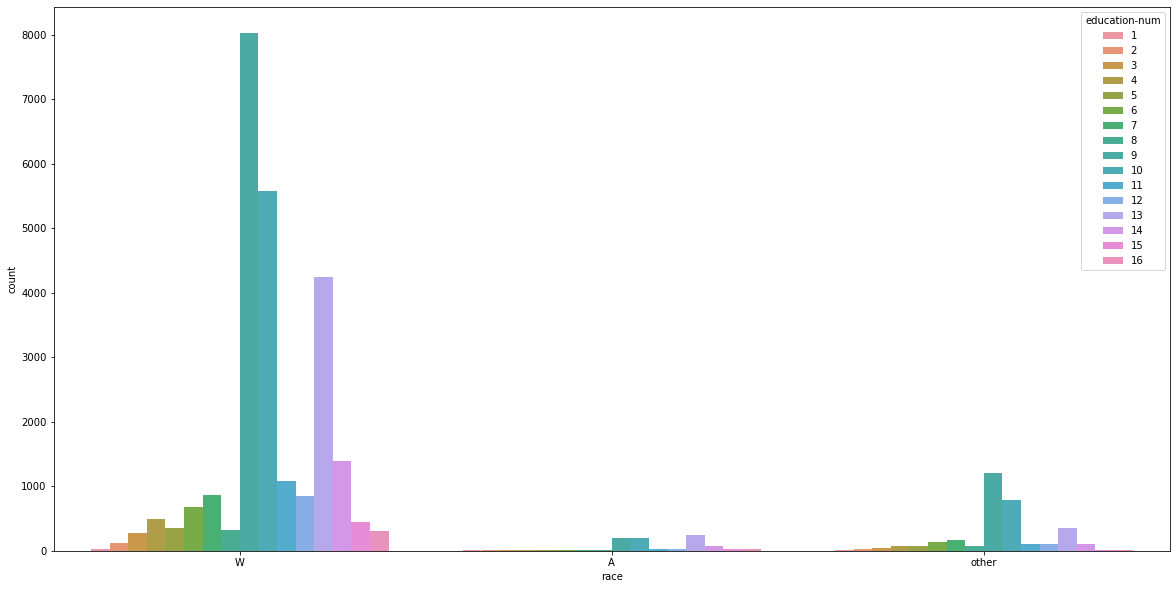

In [31]:
plt.figure(figsize = (20,10))
sns.countplot(data = train,
             x = 'race',
             hue = 'education-num')
plt.show()

##### 
- federal gov -> 미국 연방 정부 (고학력은 입법부,사법부,행정부의 고위직일 가능성이 높음)
- ?
- state gov -> 주 정부
- local gov -> 지방 정부(연방 정부보다 더 고위 학력들이 존재함)
- Self-emp-inc -> 회사의 주인
- Self-emp-not-inc -> 프리랜서(마약팔이는 분류상 여기)
- private -> 사적인이 아닌 개인 소유(간단한 사업 느낌)

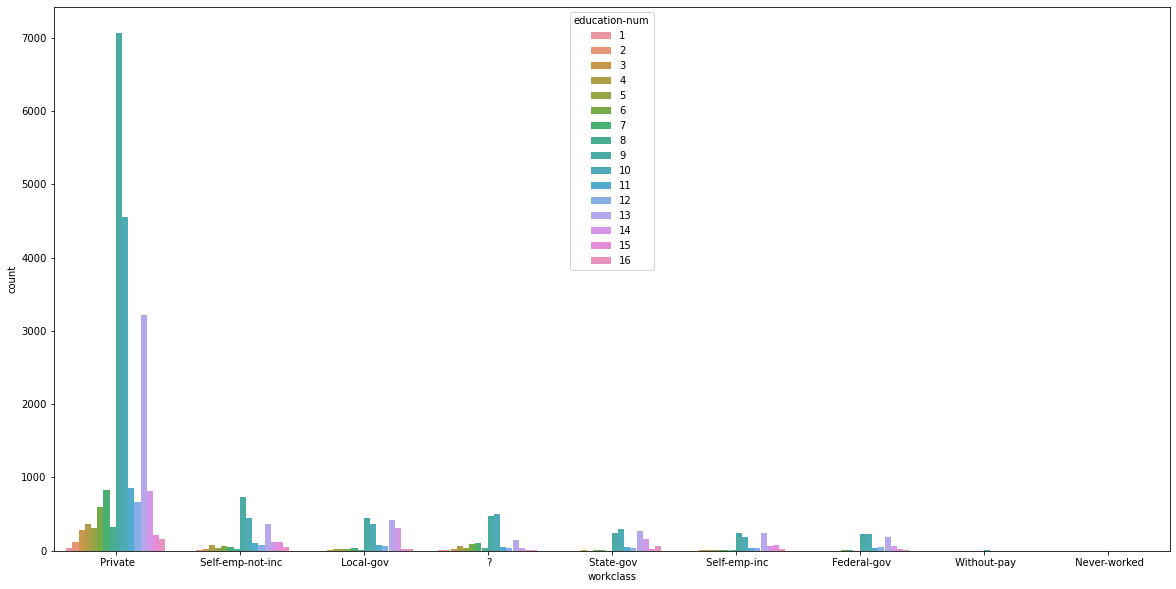

In [32]:
plt.figure(figsize = (20,10))
sns.countplot(data = train,
             x = 'workclass',
             hue = 'education-num')
plt.show()

#####  급여와 워크클래스
- 급여를 조사해보니, 돈 안받는 애들과, 무직은 0으로 확정시켜도 될듯함.
- 생각보다 Self-emp-not-inc (프리렌서) 가 페이가 쌤
- state gov workclass(정부관련기구)
- 딱히 알아갈만한 정보는 없는듯


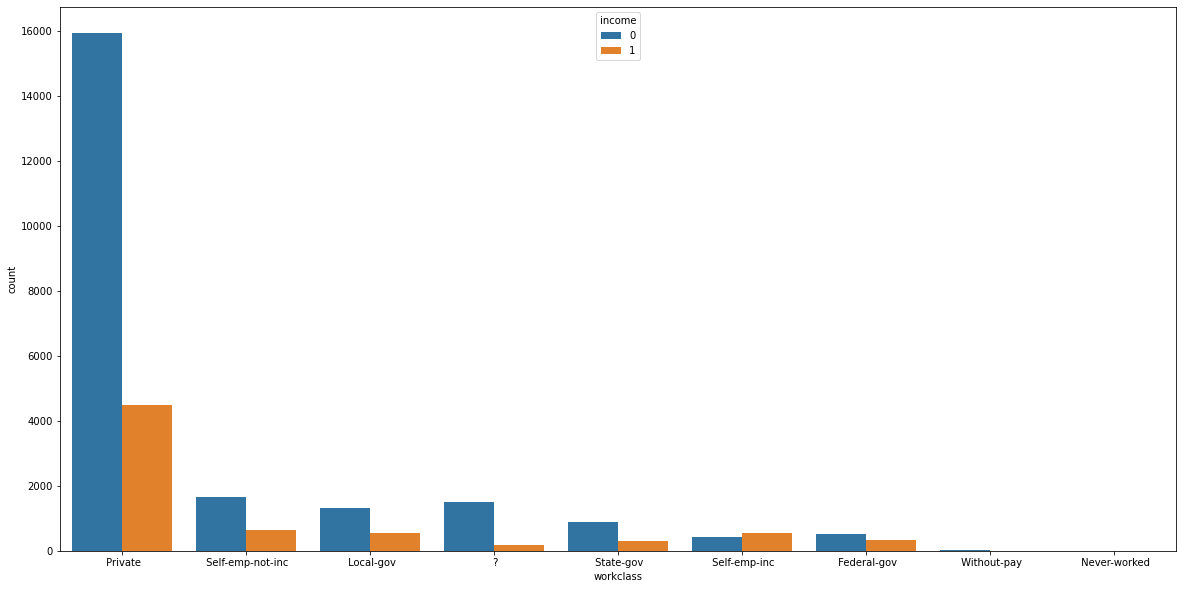

In [33]:
plt.figure(figsize = (20,10))
sns.countplot(data = train,
             x = 'workclass',
             hue = 'income')
plt.show()

##### 
private을 처리하는 방식에 따라 점수가 달라질거같음


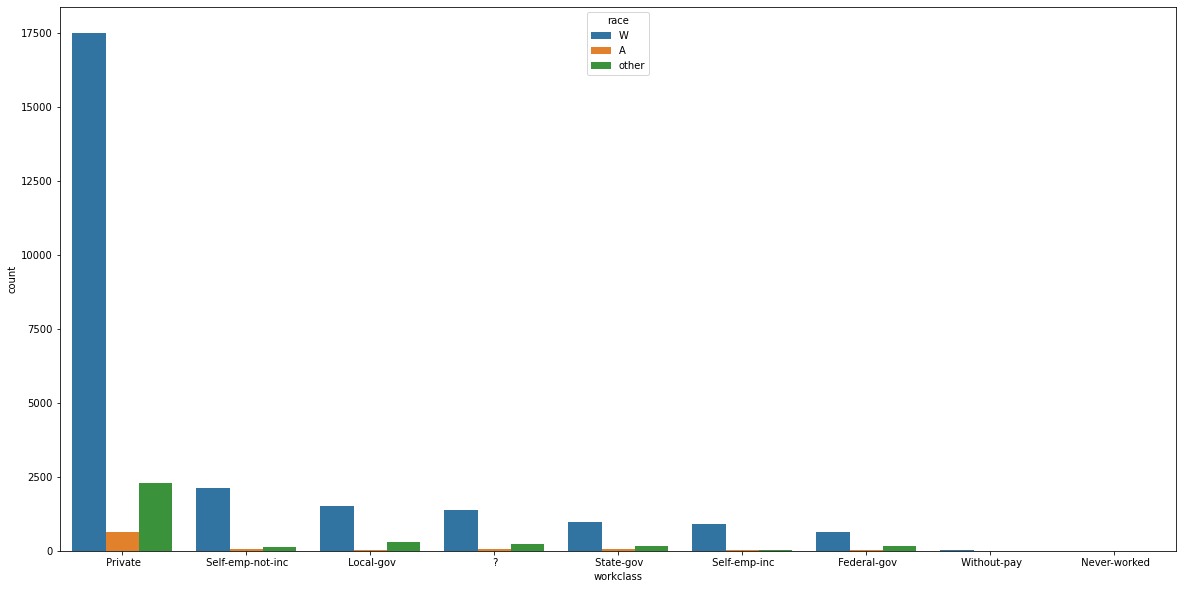

In [34]:
plt.figure(figsize = (20,10))
sns.countplot(data = train,
             x = 'workclass',
             hue = 'race')
plt.show()

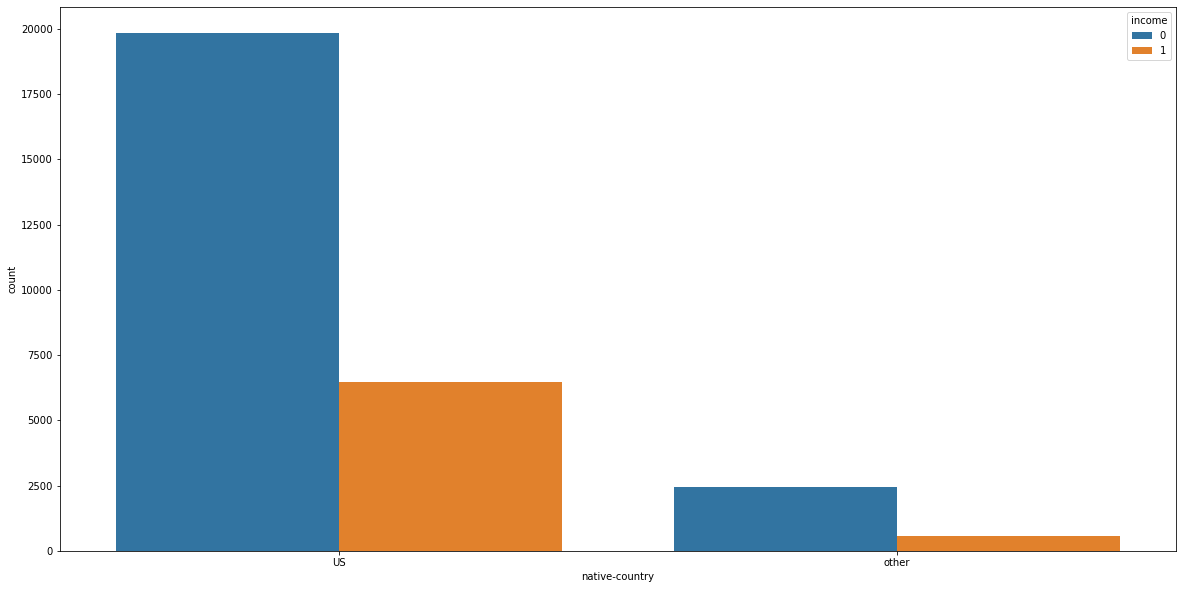

In [35]:
plt.figure(figsize = (20,10))
sns.countplot(data = train,
             x = 'native-country',
             hue = 'income')
plt.show()

In [36]:
train['native-country'].count()

29305

##### Age 분석

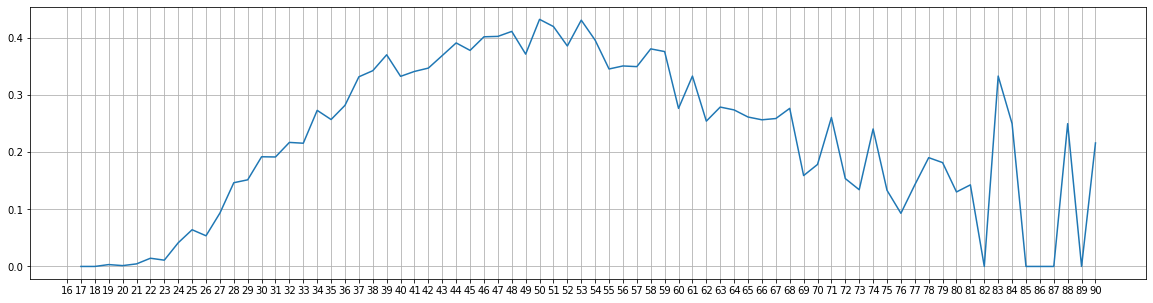

In [37]:
ageList =train['age'].unique()
ageList.sort()

total = train.groupby(['age']).count()
only1 = train.groupby(['age']).sum()
ratio = (only1/total).loc[:, 'income']


plt.figure(figsize = (20, 5))
plt.xticks(range(ageList[0] - 1, ageList[-1] + 1, 1))
plt.plot(ageList, ratio)

plt.grid()
plt.show()

### Group만들기
- 17~27까지는 1인 분포가 굉장히 적다 (< 10%)
- 28부터 본격적으로 좀 보이기 시작한다 (< 30%)
- 37세부터 59세까지는 굉장히 큰 비율을 나타낸다 (>= 30%)
- 70대 이후는 1의 비율이 큰듯 보이지만 사실 분포수가 굉장히 적다. (n <= 100)

=> \~27: young, \~36: newbie, \~61: senior, 62\~: old

##### WorkClass 분석

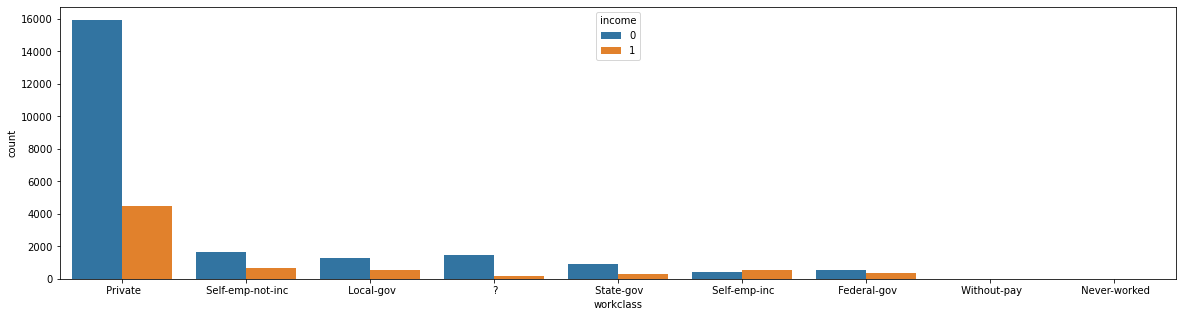

In [38]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'workclass', 
              hue = 'income', 
              data = train)

##### 
- 대부분이 Private에 속한다.
- self-emp-inc의 경우를 제외하고는 다들 비슷해보인다.
- 비율적으로 확인해보자.

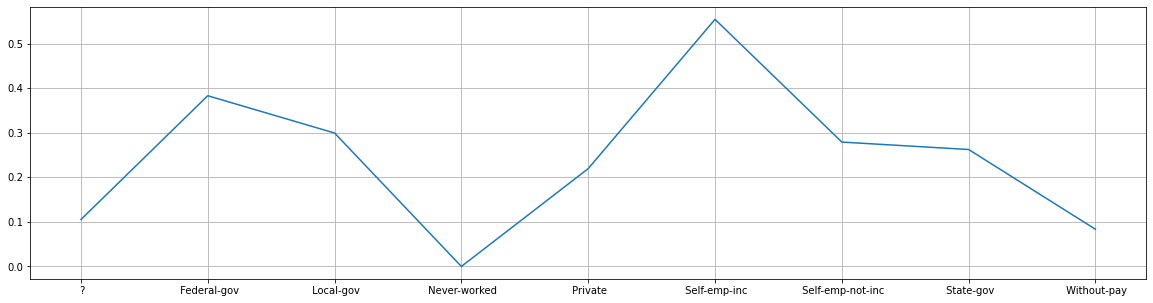

In [39]:
ageList = train['workclass'].unique()
ageList.sort()

total = train.groupby(['workclass']).count()
only1 = train.groupby(['workclass']).sum()
ratio = (only1/total).loc[:, 'income']


plt.figure(figsize = (20, 5))
plt.plot(ageList, ratio)

plt.grid()
plt.show()

### 그룹화를 진행하자
- federal-gov, self-emp-inc 두개는 평균치 0.3195보다 높다
- never-worked나 without-pay는 평균치보다 압도적으로 낮다


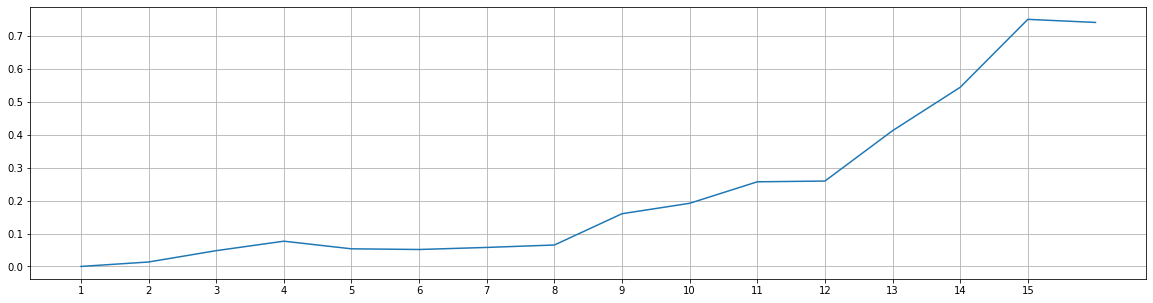

In [40]:
ageList = train['education-num'].unique()
ageList.sort()

total = train.groupby(['education-num']).count()
only1 = train.groupby(['education-num']).sum()
ratio = (only1/total).loc[:, 'income']


plt.figure(figsize = (20, 5))
plt.xticks(range(ageList[0], ageList[-1], 1))
plt.plot(ageList, ratio)

plt.grid()
plt.show()

##### marital-status 분석

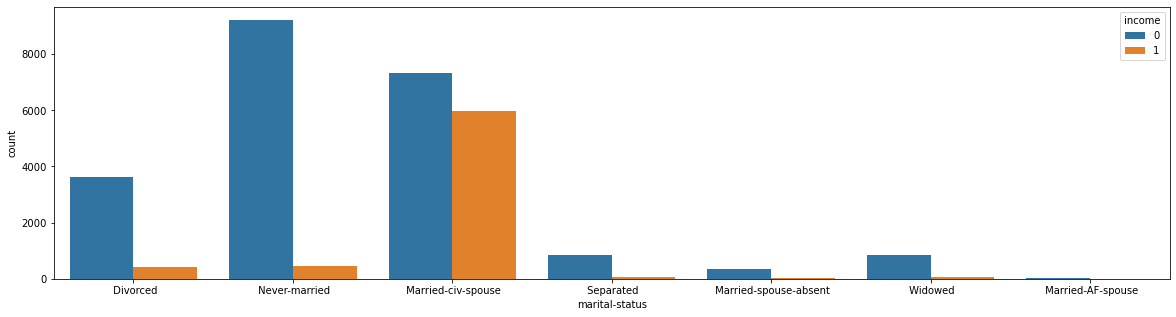

In [41]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'marital-status', 
              hue = 'income', 
              data = train)

#####  성 분석

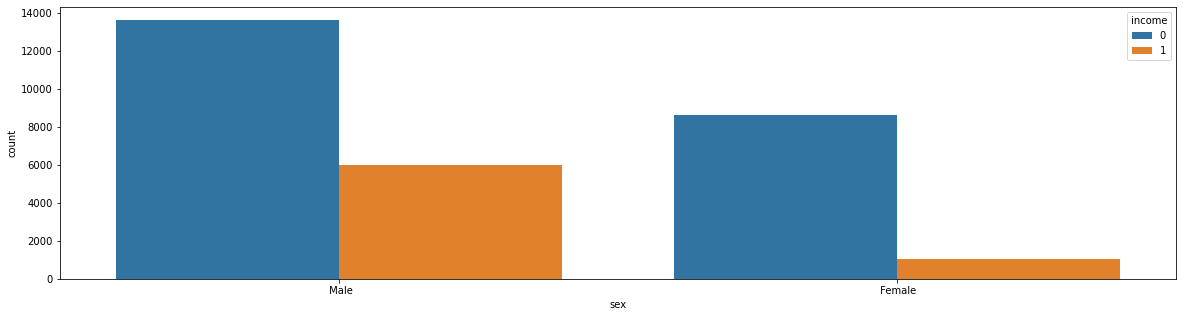

In [42]:
plt.figure(figsize = (20, 5))
sns.countplot(x = 'sex', 
              hue = 'income', 
              data = train)

#####  여기서부터사용

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [122]:
def strip_all(row):
    return row.strip()

In [123]:


train['workclass']=train['workclass'].apply(strip_all)
train['marital-status']=train['marital-status'].apply(strip_all)
train['occupation']=train['occupation'].apply(strip_all)
train['race']=train['race'].apply(strip_all)
train['sex']=train['sex'].apply(strip_all)
train['native-country']=train['native-country'].apply(strip_all)

#####  전처리 수정

In [124]:
train.drop(['no', 'fnlwgt', 'education', 'relationship', 'capital-loss','capital-gain'], axis = 1, inplace = True)

In [125]:
train.loc[train['age'] <= 27, 'age'] = 101
train.loc[train['age'] <= 36, 'age'] = 102
train.loc[train['age'] <= 61, 'age'] = 103
train.loc[train['age'] == 101, 'age'] = 0
train.loc[train['age'] == 102, 'age'] = 1
train.loc[train['age'] == 103, 'age'] = 2
train.loc[train['age'] > 61, 'age'] = 3

In [126]:

train.loc[train['workclass'] == 'Federal-gov', 'workclass'] = 2
train.loc[train['workclass'] == 'Self-emp-inc', 'workclass'] = 2

train.loc[train['workclass'] == 'Private', 'workclass'] = 1
train.loc[train['workclass'] == 'Self-emp-not-inc', 'workclass'] = 1
train.loc[train['workclass'] == 'Local-gov', 'workclass'] = 1
train.loc[train['workclass'] == 'State-gov', 'workclass'] = 1

train.loc[train['workclass'] == 'Without-pay', 'workclass'] = 0
train.loc[train['workclass'] == 'Never-worked', 'workclass'] = 0
train.loc[train['workclass'] == '?', 'workclass'] = 0

In [127]:

train.loc[train['education-num'] <= 8, 'education-num'] = 101
train.loc[train['education-num'] <= 12, 'education-num'] = 102
train.loc[train['education-num'] <= 14, 'education-num'] = 103
train.loc[train['education-num'] == 101, 'education-num'] = 0
train.loc[train['education-num'] == 102, 'education-num'] = 1
train.loc[train['education-num'] == 103, 'education-num'] = 2
train.loc[train['education-num'] > 14, 'education-num'] = 3

In [128]:

train.loc[train['marital-status'] == 'Married-civ-spouse', 'marital-status'] = 0
train.loc[train['marital-status'] == 'Married-AF-spouse', 'marital-status'] = 0
train.loc[train['marital-status'] != 0, 'marital-status'] = 1


In [129]:
train.loc[train['occupation'] == '?', 'occupation'] = 0
train.loc[train['occupation'] == 'Adm-clerical', 'occupation'] = 0
train.loc[train['occupation'] == 'Farming-fishing', 'occupation'] = 0
train.loc[train['occupation'] == 'Handlers-cleaners', 'occupation'] = 0
train.loc[train['occupation'] == 'Machine-op-inspct', 'occupation'] = 0
train.loc[train['occupation'] == 'Other-service', 'occupation'] = 0
train.loc[train['occupation'] == 'Priv-house-serv', 'occupation'] = 0
train.loc[train['occupation'] == 'Armed-Forces', 'occupation'] = 1
train.loc[train['occupation'] == 'Craft-repair', 'occupation'] = 1
train.loc[train['occupation'] == 'Protective-serv', 'occupation'] = 1
train.loc[train['occupation'] == 'Sales', 'occupation'] = 1
train.loc[train['occupation'] == 'Tech-support', 'occupation'] = 1
train.loc[train['occupation'] == 'Transport-moving', 'occupation'] = 1
train.loc[train['occupation'] == 'Prof-specialty', 'occupation'] = 2
train.loc[train['occupation'] == 'Exec-managerial', 'occupation'] = 2

In [130]:
train.loc[train['race'] == 'W', 'race'] = 0
train.loc[train['race'] == 'A', 'race'] = 0
train.loc[train['race'] != 0, 'race'] = 1

In [131]:
train.loc[train['sex'] == 'Male', 'sex'] = 0
train.loc[train['sex'] == 'Female', 'sex'] = 1

In [132]:
train.loc[train['hours-per-week'] < 40, 'hours-per-week'] = 0
train.loc[train['hours-per-week'] == 40, 'hours-per-week'] = 1
train.loc[train['hours-per-week'] > 40, 'hours-per-week'] = 2

In [133]:
train.loc[train['native-country'] == 'Columbia', 'native-country'] = 0
train.loc[train['native-country'] == 'Dominican-Republic', 'native-country'] = 0
train.loc[train['native-country'] == 'El-Salvador', 'native-country'] = 0
train.loc[train['native-country'] == 'Guatemala', 'native-country'] = 0
train.loc[train['native-country'] == 'Haiti', 'native-country'] = 0
train.loc[train['native-country'] == 'Holand-Netherlands', 'native-country'] = 0
train.loc[train['native-country'] == 'Honduras', 'native-country'] = 0
train.loc[train['native-country'] == 'Laos', 'native-country'] = 0
train.loc[train['native-country'] == 'Mexico', 'native-country'] = 0
train.loc[train['native-country'] == 'Outlying-US(Guam-USVI-etc)', 'native-country'] = 0
train.loc[train['native-country'] == 'Trinadad&Tobago', 'native-country'] = 0
train.loc[train['native-country'] == 'Vietnam', 'native-country'] = 0

train.loc[train['native-country'] != 0, 'native-country'] = 1

In [134]:

train.loc[train['native-country'] != 0, 'native-country'] = 1

y = train.pop('income')
x = train

In [100]:
x

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country
0,0,1,0,1,0,1,0,1,1
1,2,1,1,1,0,1,1,2,1
2,1,1,2,1,0,1,1,2,1
3,3,1,1,1,1,1,1,1,1
4,0,1,1,0,1,1,0,2,1
...,...,...,...,...,...,...,...,...,...
29300,0,1,1,1,1,1,0,1,1
29301,0,1,1,1,1,1,0,1,1
29302,0,1,0,1,0,1,0,1,1
29303,1,1,0,1,1,1,0,2,1


In [101]:
y

0        0
1        0
2        0
3        0
4        1
        ..
29300    0
29301    0
29302    0
29303    0
29304    0
Name: income, Length: 29305, dtype: int64

In [135]:
test['workclass']=test['workclass'].apply(strip_all)
test['marital-status']=test['marital-status'].apply(strip_all)
test['occupation']=test['occupation'].apply(strip_all)
test['race']=test['race'].apply(strip_all)
test['sex']=test['sex'].apply(strip_all)
test['native-country']=test['native-country'].apply(strip_all)

test.drop(['no', 'fnlwgt', 'education', 'relationship', 'capital-loss','capital-gain'], axis = 1, inplace = True)

test.loc[test['age'] <= 27, 'age'] = 101
test.loc[test['age'] <= 36, 'age'] = 102
test.loc[test['age'] <= 61, 'age'] = 103
test.loc[test['age'] == 101, 'age'] = 0
test.loc[test['age'] == 102, 'age'] = 1
test.loc[test['age'] == 103, 'age'] = 2
test.loc[test['age'] > 61, 'age'] = 3


test.loc[test['workclass'] == 'Federal-gov', 'workclass'] = 2
test.loc[test['workclass'] == 'Self-emp-inc', 'workclass'] = 2

test.loc[test['workclass'] == 'Private', 'workclass'] = 1
test.loc[test['workclass'] == 'Self-emp-not-inc', 'workclass'] = 1
test.loc[test['workclass'] == 'Local-gov', 'workclass'] = 1
test.loc[test['workclass'] == 'State-gov', 'workclass'] = 1

test.loc[test['workclass'] == 'Without-pay', 'workclass'] = 0
test.loc[test['workclass'] == 'Never-worked', 'workclass'] = 0
test.loc[test['workclass'] == '?', 'workclass'] = 0

test.loc[test['education-num'] <= 8, 'education-num'] = 101
test.loc[test['education-num'] <= 12, 'education-num'] = 102
test.loc[test['education-num'] <= 14, 'education-num'] = 103
test.loc[test['education-num'] == 101, 'education-num'] = 0
test.loc[test['education-num'] == 102, 'education-num'] = 1
test.loc[test['education-num'] == 103, 'education-num'] = 2
test.loc[test['education-num'] > 14, 'education-num'] = 3


test.loc[test['marital-status'] == 'Married-civ-spouse', 'marital-status'] = 0
test.loc[test['marital-status'] == 'Married-AF-spouse', 'marital-status'] = 0
test.loc[test['marital-status'] != 0, 'marital-status'] = 1

test.loc[test['occupation'] == '?', 'occupation'] = 0
test.loc[test['occupation'] == 'Adm-clerical', 'occupation'] = 0
test.loc[test['occupation'] == 'Farming-fishing', 'occupation'] = 0
test.loc[test['occupation'] == 'Handlers-cleaners', 'occupation'] = 0
test.loc[test['occupation'] == 'Machine-op-inspct', 'occupation'] = 0
test.loc[test['occupation'] == 'Other-service', 'occupation'] = 0
test.loc[test['occupation'] == 'Priv-house-serv', 'occupation'] = 0
test.loc[test['occupation'] == 'Armed-Forces', 'occupation'] = 1
test.loc[test['occupation'] == 'Craft-repair', 'occupation'] = 1
test.loc[test['occupation'] == 'Protective-serv', 'occupation'] = 1
test.loc[test['occupation'] == 'Sales', 'occupation'] = 1
test.loc[test['occupation'] == 'Tech-support', 'occupation'] = 1
test.loc[test['occupation'] == 'Transport-moving', 'occupation'] = 1
test.loc[test['occupation'] == 'Prof-specialty', 'occupation'] = 2
test.loc[test['occupation'] == 'Exec-managerial', 'occupation'] = 2

test.loc[test['race'] == 'W', 'race'] = 0
test.loc[test['race'] == 'A', 'race'] = 0
test.loc[test['race'] != 0, 'race'] = 1

test.loc[test['sex'] == 'Male', 'sex'] = 0
test.loc[test['sex'] == 'Female', 'sex'] = 1

test.loc[test['hours-per-week'] < 40, 'hours-per-week'] = 0
test.loc[test['hours-per-week'] == 40, 'hours-per-week'] = 1
test.loc[test['hours-per-week'] > 40, 'hours-per-week'] = 2

test.loc[test['native-country'] == 'Columbia', 'native-country'] = 0
test.loc[test['native-country'] == 'Dominican-Republic', 'native-country'] = 0
test.loc[test['native-country'] == 'El-Salvador', 'native-country'] = 0
test.loc[test['native-country'] == 'Guatemala', 'native-country'] = 0
test.loc[test['native-country'] == 'Haiti', 'native-country'] = 0
test.loc[test['native-country'] == 'Holand-Netherlands', 'native-country'] = 0
test.loc[test['native-country'] == 'Honduras', 'native-country'] = 0
test.loc[test['native-country'] == 'Laos', 'native-country'] = 0
test.loc[test['native-country'] == 'Mexico', 'native-country'] = 0
test.loc[test['native-country'] == 'Outlying-US(Guam-USVI-etc)', 'native-country'] = 0
test.loc[test['native-country'] == 'Trinadad&Tobago', 'native-country'] = 0
test.loc[test['native-country'] == 'Vietnam', 'native-country'] = 0

test.loc[test['native-country'] != 0, 'native-country'] = 1

In [103]:
test

,age,workclass,education-num,marital-status,occupation,race,sex,hours-per-week,native-country
0,0,0,1,1,0,1,0,0,1
1,1,1,1,0,0,1,1,1,1
2,2,1,2,0,1,1,0,1,1
3,2,1,2,0,2,1,0,1,1
4,2,1,3,0,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...
19532,2,1,1,0,1,1,0,2,1
19533,2,1,1,1,2,1,1,2,1
19534,3,1,1,0,2,1,0,1,1
19535,0,1,0,1,1,1,1,0,1


##### 전처리 수정 끝

##### 모델 선정 학습 평가

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

In [106]:
model = RandomForestClassifier()

In [107]:
model.fit(x,y)

RandomForestClassifier()

In [108]:
model.predict(test)

array([0, 0, 1, ..., 1, 0, 0], dtype=int64)

##### 모델 선정 학습 평가 끝

In [109]:
model_pre = model.predict(test)

In [110]:
len(model_pre)

19537

In [112]:
submissionTree = pd.read_csv('sample_submission.csv')

In [113]:
submissionTree

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [114]:
submissionTree['income'] = model_pre

In [115]:
submissionTree

,no,income
0,29306,0
1,29307,0
2,29308,1
3,29309,1
4,29310,1
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [116]:
submissionTree.to_csv('sample_submission.csv', index = False)